In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import music21
import scipy.interpolate

In [2]:
data_path = "data/"
collection = "ONeillsJigs"

In [3]:
# load the dataframe
df = pd.read_pickle(f"{data_path}{collection}_parsed.pkl")
df.head()

,title,time_signature,key,abcdata,abc_raw,timespace,pitchspace,TimePitchTune,TimePitchBars
0,Shandon bells,6/8,Cmaj,A |: G E C C E G | c d c B A G | A F D D E G |...,T:Shandon bells\nM:6/8\nK:Cmaj\nA |: G E C C E...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[69.0, 64.0, 60.0, 60.0, 64.0, 67.0, 72.0, 74....","[69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69....","[[69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69..."
1,The piper's picnic,6/8,Cmaj,G | c e c d B G | e f g f d B | c e c d B G | ...,T:The piper's picnic\nM:6/8\nK:Cmaj\nG | c e c...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[67.0, 76.0, 72.0, 74.0, 71.0, 67.0, 76.0, 77....","[67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67....","[[67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67..."
2,Hartigan's fancy,6/8,Cmaj,"G, | E 2 E C E G | F E F D E F | E 2 E C E G |...","T:Hartigan's fancy\nM:6/8\nK:Cmaj\nG, | E 2 E ...","[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[55.0, 64.0, 60.0, 64.0, 67.0, 65.0, 64.0, 65....","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....","[[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55..."
3,The yellow flail,6/8,Cmaj,"G /2 F /2 | E D C C B, C | G, 2 A, B, A, B, | ...",T:The yellow flail\nM:6/8\nK:Cmaj\nG /2 F /2 |...,"[0.0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 8.5, ...","[67.0, 64.0, 62.0, 60.0, 60.0, 59.0, 60.0, 55....","[67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 64....","[[67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 64..."
4,Kitty's rambles,6/8,Cmix,F | E D C B A G | c =B c d e f | e d c B G E |...,T:Kitty's rambles\nM:6/8\nK:Cmix\nF | E D C B ...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[65.0, 62.0, 60.0, 70.0, 69.0, 67.0, 72.0, 71....","[65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....","[[65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65..."


In [4]:
# need to update musescore path in music21 environment to use musescore 4
import music21
environment = music21.environment.Environment()

# For macOS, update to MuseScore 4 path
environment['musescoreDirectPNGPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'

# Write the changes
environment.write()

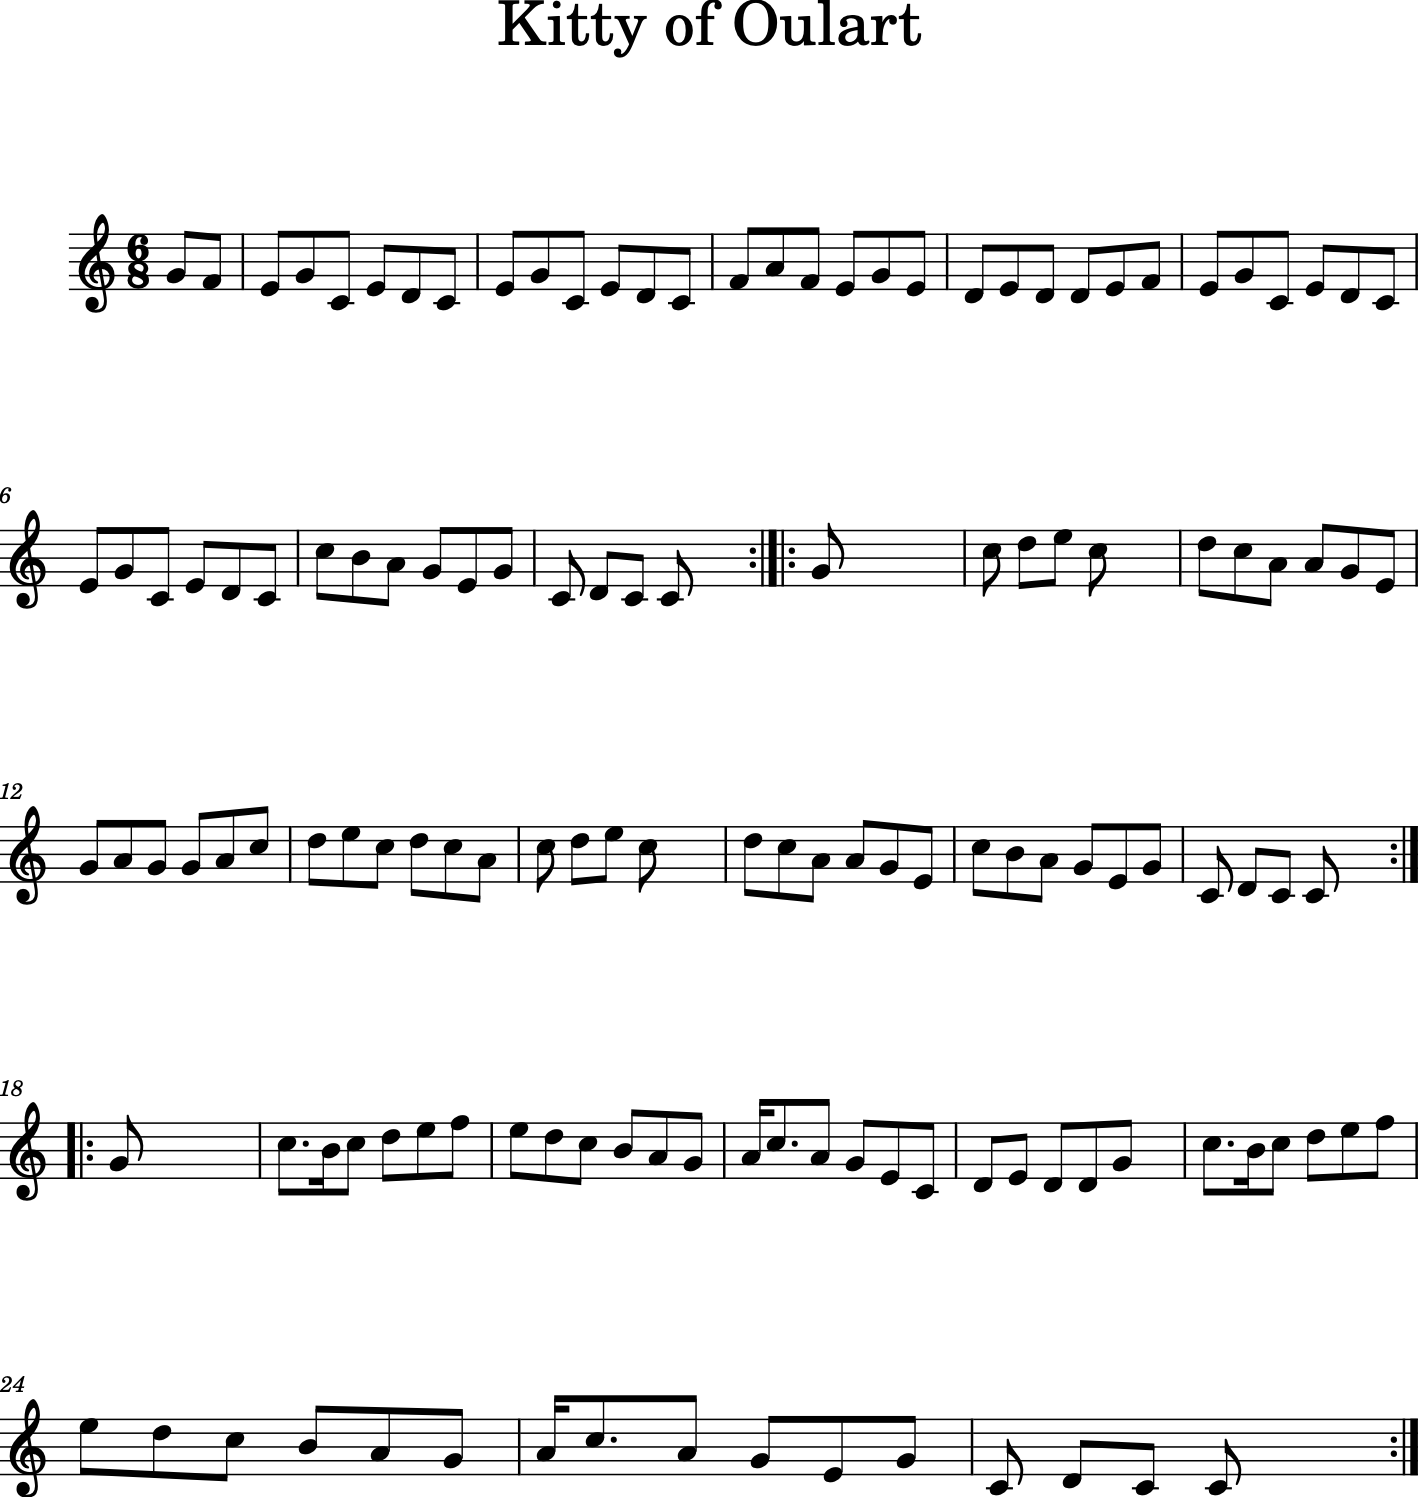

In [5]:
row = df.get(df["title"] == "Kitty of Oulart")  # tune 284

abc_tune = row["abc_raw"].values[0]  # Get ABC notation from your dataframe

s = music21.converter.parse(abc_tune, format='abc')
s.show()

In [6]:
from display_utils import display_abc

display_abc(abc_tune)

<IPython.core.display.Javascript object>

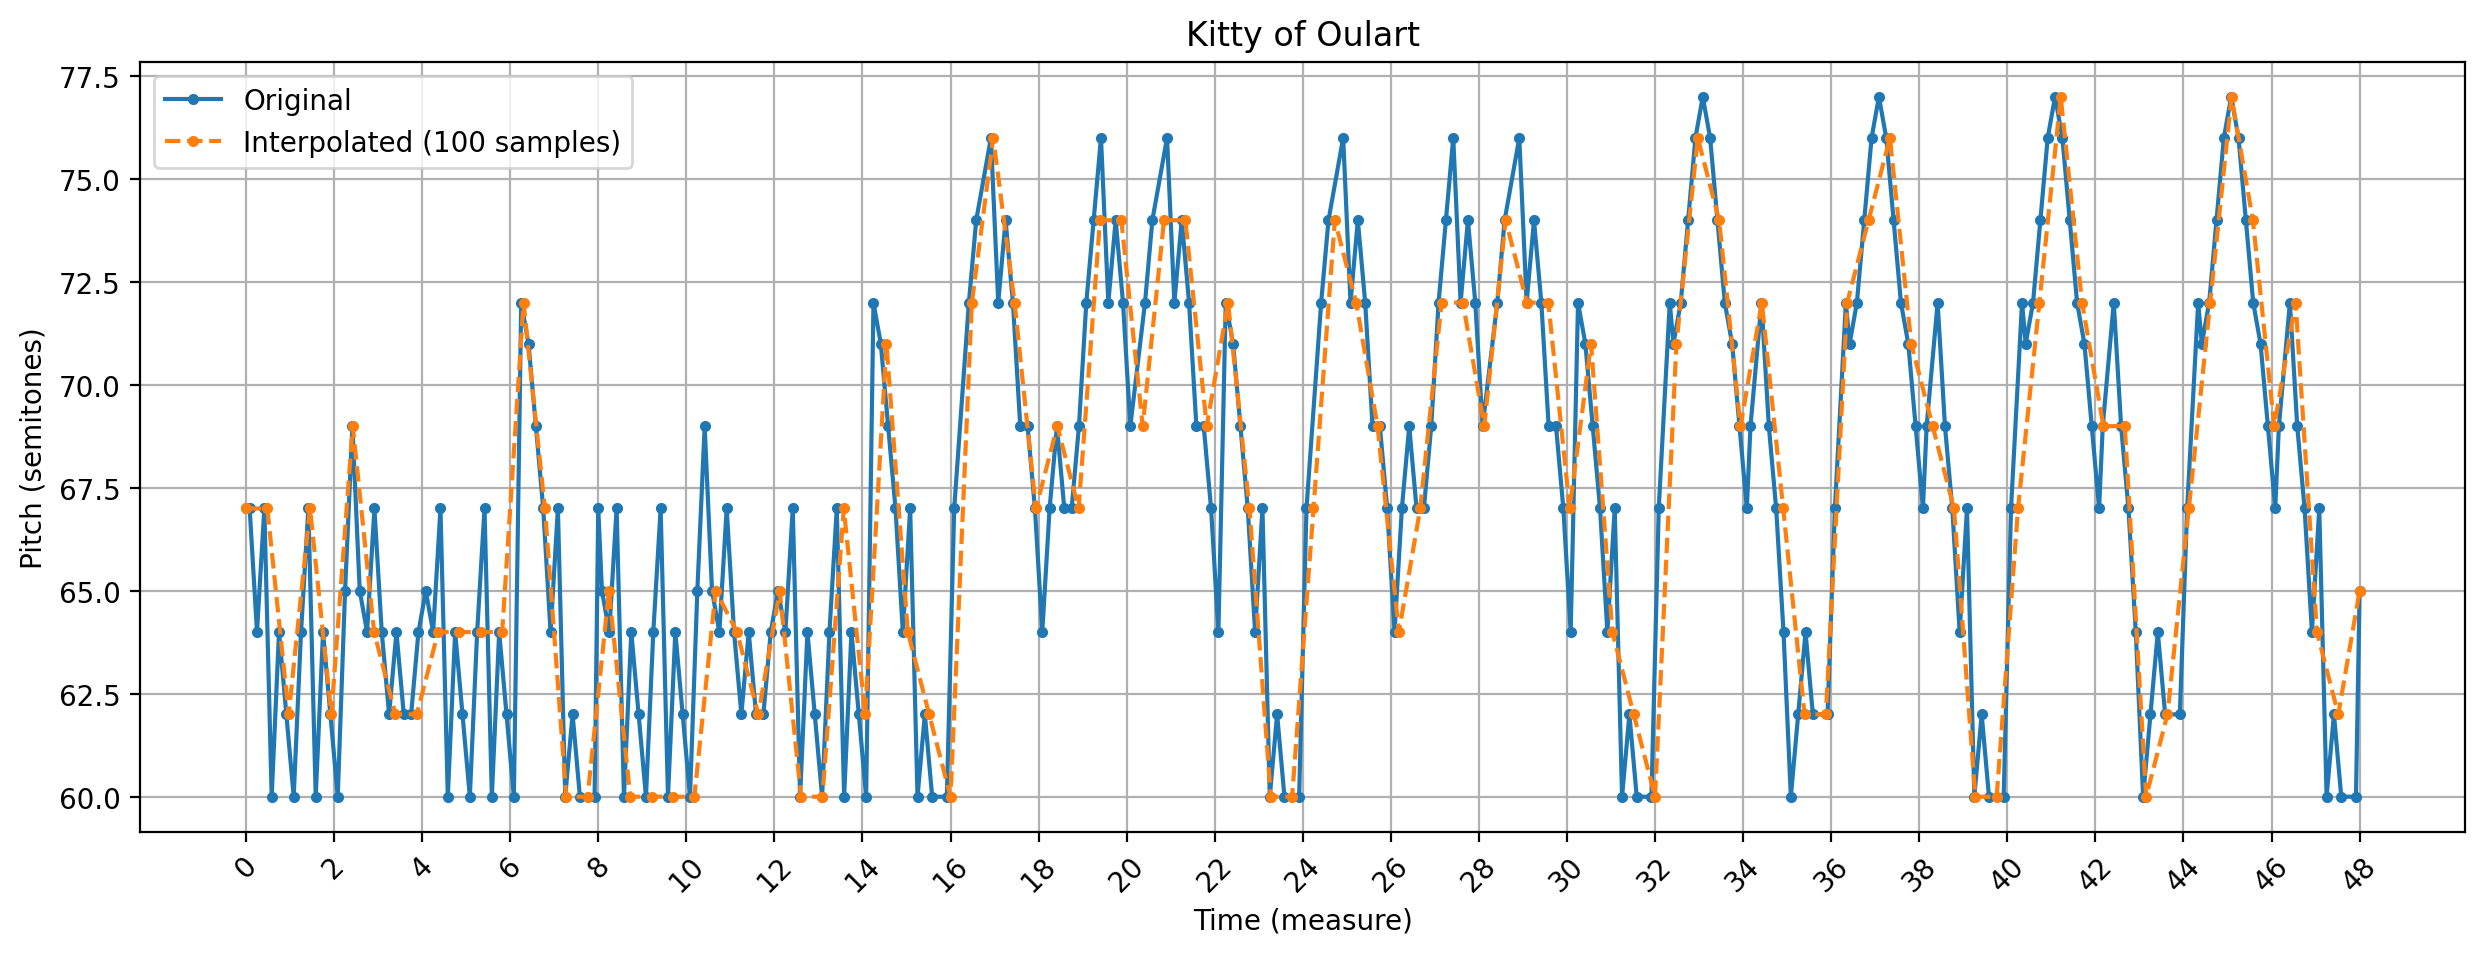

In [7]:

# get the contour
times = row["timespace"].values[0]
pitches = row["pitchspace"].values[0]
# add the first pitch again at the beginning
pitches = np.insert(pitches, 0, pitches[0])

TimePitchTune = row["TimePitchTune"].values[0]
tt = np.arange(0,len(TimePitchTune))

num_samples = 100
# Create a single figure and axis for both plots
fig, ax = plt.subplots(figsize=(15, 5))

# Original contour plot
ax.plot(times / 6, pitches, '.-', label="Original")
ax.set_xlabel("Time (measure)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title(row["title"].values[0])
ax.grid()
ax.legend()

# Interpolated contour plot with 100 samples
interpolated_times = np.linspace(0, times[-1] / 6, num_samples)
interpolated_pitches = scipy.interpolate.interp1d(times / times[-1], pitches, kind="previous")(np.linspace(0, 1, num_samples))
ax.plot(interpolated_times, interpolated_pitches, '.--', label=f"Interpolated ({num_samples} samples)")
ax.legend()

# Set x-axis ticks
plt.xticks(np.arange(0, times[-1] / 6 + 1, 2), rotation=45)

plt.show()

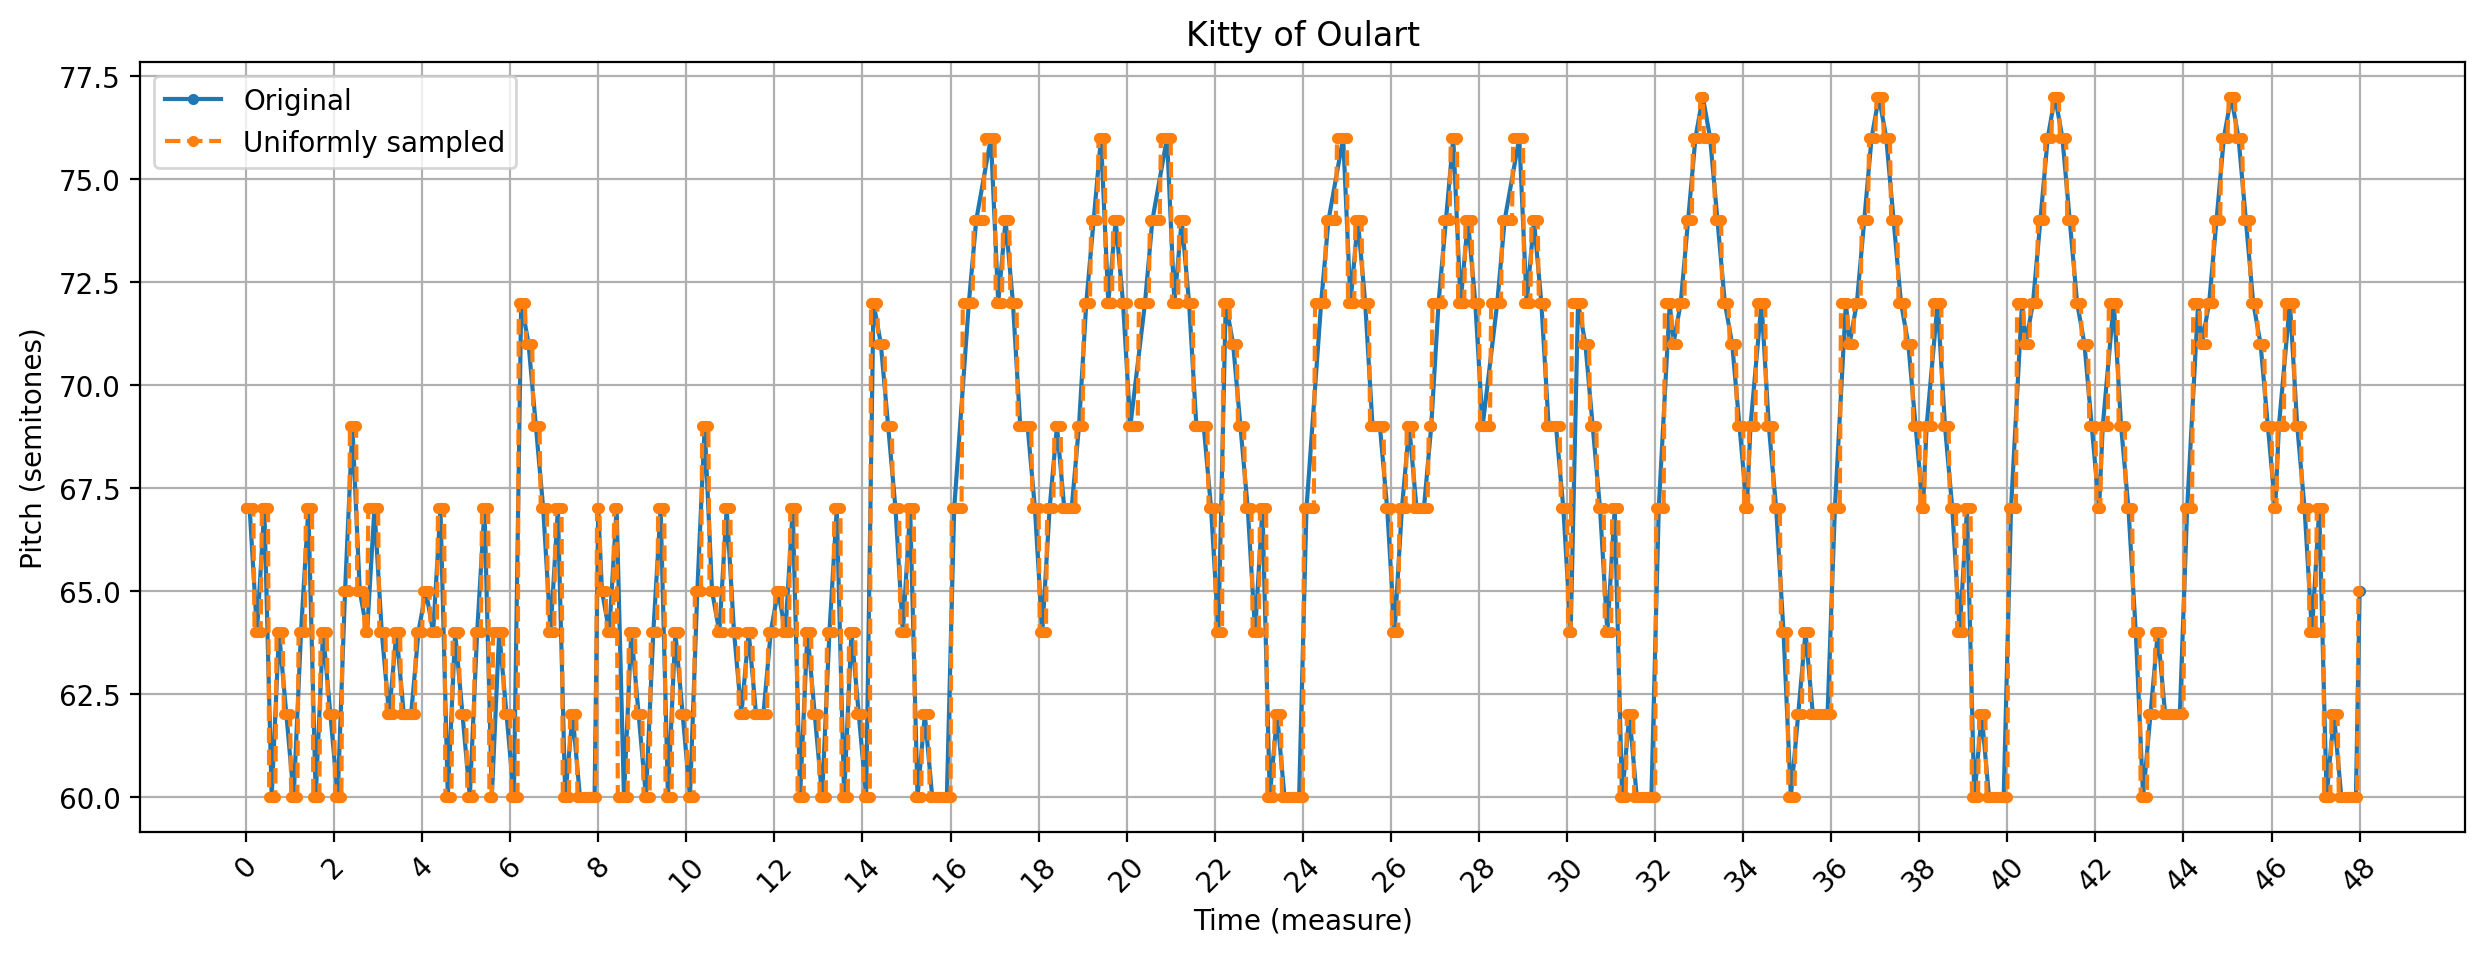

In [8]:
# Create a single figure and axis for both plots
fig, ax = plt.subplots(figsize=(15, 5))

# Original contour plot
ax.plot(times / 6, pitches, '.-', label="Original")
ax.set_xlabel("Time (measure)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title(row["title"].values[0])
ax.grid()
ax.legend()

ax.plot(tt/(6*6), TimePitchTune, '.--', label='Uniformly sampled')
ax.legend()

# Set x-axis ticks
plt.xticks(np.arange(0, times[-1] / 6 + 1, 2), rotation=45)

plt.show()

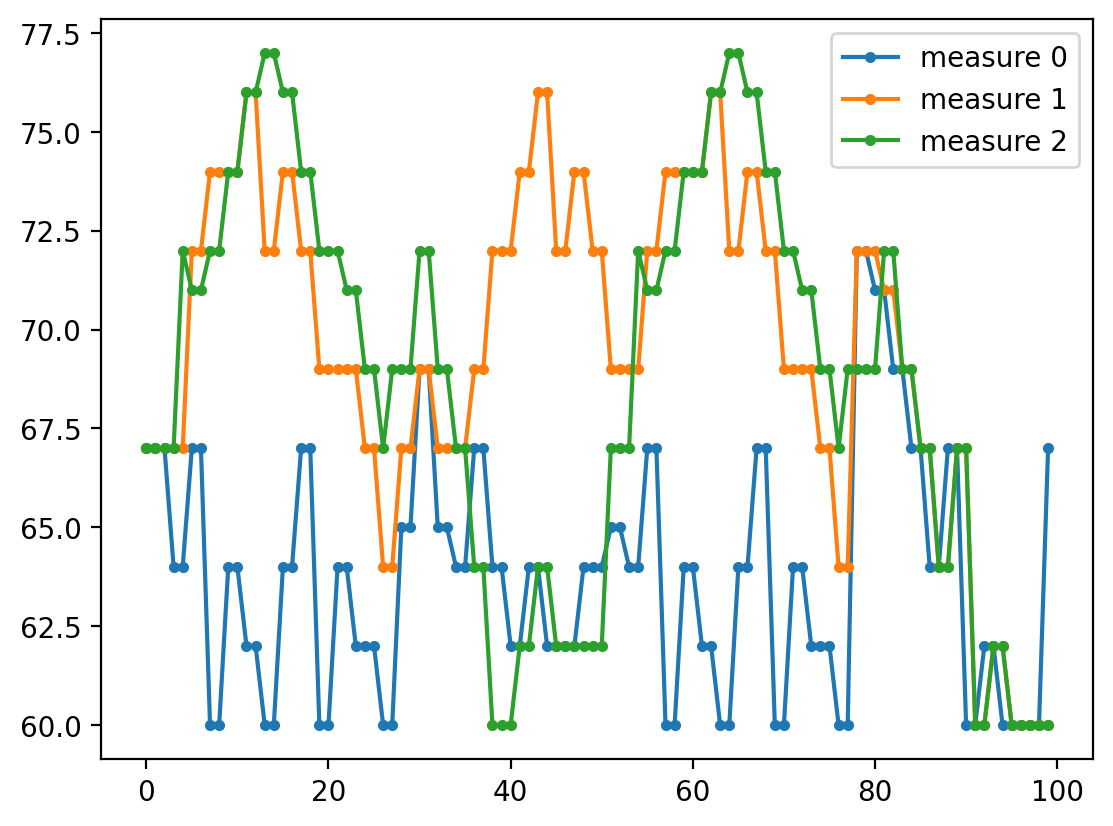

In [9]:
# now let's get the contour of the different parts (split by 8 measures)
# get the indices where measures are multiples of measure_resolution
indices = np.where(np.mod((times-times[1])/6, 8) == 0)[0] # times-times[1] because of anacrusis
for i in range(0, len(indices) - 1, 2): # we take every two, as we extended the repeat signs
    start = indices[i]
    end = indices[i + 1]
    # Interpolate the contour of that section
    func = scipy.interpolate.interp1d(
        (times[start:end] - times[start]) / (times[end - 1] - times[start]),
        pitches[start:end],
        kind="previous",
    )
    pitches_out = func(np.linspace(0, 1, 100))
    plt.plot(pitches_out, '.-', label=f"measure {int(i/2)}")
plt.legend()
plt.show()